### Datasets & Source

In [1]:
import pandas as pd

# If True then use local datasets with latest record date 2022-3-11
# If False then read from the updated source
TEST = True


Datasets are from one of the most trusted and well-maintained public repositories:
- Johns Hopkins Univeristy Center for Systems Science and Engineering Dataset for Covid-19 (Hereinafter referred as CSSEGIS dataset). GitHub link: https://github.com/CSSEGISandData/COVID-19.
> Ensheng Dong, Hongru Du, Lauren Gardner. 2020. ``An interactive web-based dashboard to track COVID-19 in real time". The Lancet Infectious Diseases Correpsondence, volume 20, issue 5, p533-534. DOI:10.1016/S1473-3099(20)30120-1.

which is updated in a daily basis.

More precisely, we will use three two series global confirmed and global death cases.

In [2]:
# Confirmed cases dataframe
confirmed_df = pd.read_csv(
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv' if not TEST else 'Test_Data/time_series_covid19_confirmed_global.csv'
    )
confirmed_df.head(5)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/22,3/3/22,3/4/22,3/5/22,3/6/22,3/7/22,3/8/22,3/9/22,3/10/22,3/11/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,174073,174214,174214,174331,174582,175000,175353,175525,175893,175974
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,271825,271825,272030,272030,272210,272250,272337,272412,272479,272552
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265079,265130,265186,265227,265265,265297,265323,265346,265366,265391
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,38249,38342,38434,38434,38434,38620,38710,38794,38794,38794
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,98746,98746,98796,98796,98806,98806,98829,98855,98855,98855


In [3]:
# Death cases dataframe
deaths_df = pd.read_csv(
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv' if not TEST else 'Test_Data/time_series_covid19_deaths_global.csv'
    )
deaths_df.head(5)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/22,3/3/22,3/4/22,3/5/22,3/6/22,3/7/22,3/8/22,3/9/22,3/10/22,3/11/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7617,7619,7619,7622,7623,7626,7630,7636,7639,7640
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3474,3474,3478,3478,3482,3483,3483,3483,3484,3485
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6843,6848,6852,6853,6855,6857,6858,6860,6861,6861
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,151,151,151,151,151,151,152,152,152,152
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


And one time series for vaccination count.

In [4]:
vaccines_df = pd.read_csv(
    'https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_doses_admin_global.csv' if not TEST else 'Test_Data/time_series_covid19_vaccine_doses_admin_global.csv'
    ).drop(columns=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Combined_Key', 'Population']).rename(columns={'Long_': 'Long', 'Province_State': 'Province/State', 'Country_Region': 'Country/Region'})
vaccines_df.head(5)


,Province/State,Country/Region,Lat,Long,2020-12-12,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,...,2022-03-05,2022-03-06,2022-03-07,2022-03-08,2022-03-09,2022-03-10,2022-03-11,2022-03-12,2022-03-13,2022-03-14
0,NaN,Afghanistan,33.9391,67.7100,NaN,NaN,NaN,NaN,NaN,NaN,...,5535254.0,5597130.0,5597130.0,5597130.0,5597130.0,5597130.0,5597130.0,5597130.0,5597130.0,5597130.0
1,NaN,Albania,41.1533,20.1683,NaN,NaN,NaN,NaN,NaN,NaN,...,2708574.0,2708574.0,2708574.0,2708574.0,2723146.0,2723146.0,2729969.0,2729969.0,2729969.0,2729969.0
2,NaN,Algeria,28.0339,1.6596,0.0,0.0,0.0,0.0,0.0,0.0,...,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0
3,NaN,Andorra,42.5063,1.5218,0.0,0.0,0.0,0.0,0.0,0.0,...,142420.0,142420.0,142420.0,142420.0,142420.0,142420.0,142420.0,142420.0,142420.0,142420.0
4,NaN,Angola,-11.2027,17.8739,NaN,NaN,NaN,NaN,NaN,NaN,...,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0


### Preparation & Preprocessing


In [5]:
import datetime


Since vaccination is only available after about one year from the outbreak, we are going to explore on the recent one year data, from 2021-3-1 to 2022-2-28. Some Alignments are required because of different record formats:
- Generate desired columns/rows to keep.

In [6]:
start_date, end_date = datetime.date(2021, 3, 1), datetime.date(2022, 3, 1)
CSSEGIS_col = ['Province/State', 'Country/Region', 'Lat', 'Long', 'Population']
dates_format_1, dates_format_2 = [], []

# Single date generator
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + datetime.timedelta(n)

for single_date in daterange(start_date, end_date):
    dates_format_1.append(single_date.strftime('%#m/%#d/%y'))
    dates_format_2.append(single_date.strftime('%Y-%m-%d'))

dates_format_1[:5], dates_format_2[:5]


(['3/1/21', '3/2/21', '3/3/21', '3/4/21', '3/5/21'],
 ['2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04', '2021-03-05'])

- Keep only data within the range of interest for the two sources respectively.

In [7]:
oneyear_confirmed_df = confirmed_df[confirmed_df.columns.intersection([*CSSEGIS_col, *dates_format_1])]
oneyear_deaths_df = deaths_df[deaths_df.columns.intersection([*CSSEGIS_col, *dates_format_1])]

# oneyear_confirmed_df.head(5)
oneyear_deaths_df.head(5)


,Province/State,Country/Region,Lat,Long,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,...,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22,2/26/22,2/27/22,2/28/22
0,NaN,Afghanistan,33.93911,67.709953,2444,2446,2446,2446,2449,2449,...,7534,7539,7549,7569,7574,7578,7579,7585,7593,7598
1,NaN,Albania,41.15330,20.168300,1816,1835,1856,1876,1897,1918,...,3433,3438,3445,3451,3453,3457,3458,3458,3464,3469
2,NaN,Algeria,28.03390,1.659600,2987,2991,2996,3002,3007,3010,...,6787,6797,6805,6812,6816,6820,6823,6828,6831,6835
3,NaN,Andorra,42.50630,1.521800,110,110,112,112,112,112,...,150,150,150,151,151,151,151,151,151,151
4,NaN,Angola,-11.20270,17.873900,508,510,510,511,511,512,...,1899,1899,1899,1899,1899,1899,1899,1899,1899,1900


In [8]:
oneyear_vaccines_df = vaccines_df[vaccines_df.columns.intersection([*CSSEGIS_col,*dates_format_2])]

oneyear_vaccines_df.head(5)


,Province/State,Country/Region,Lat,Long,2021-03-01,2021-03-02,2021-03-03,2021-03-04,2021-03-05,2021-03-06,...,2022-02-19,2022-02-20,2022-02-21,2022-02-22,2022-02-23,2022-02-24,2022-02-25,2022-02-26,2022-02-27,2022-02-28
0,NaN,Afghanistan,33.9391,67.7100,8200.0,8200.0,8200.0,8200.0,8200.0,8200.0,...,5321308.0,5321308.0,5412309.0,5412309.0,5412309.0,5412309.0,5412309.0,5412309.0,5535254.0,5535254.0
1,NaN,Albania,41.1533,20.1683,14295.0,14295.0,15793.0,15793.0,15793.0,15793.0,...,2673183.0,2673183.0,2686398.0,2686398.0,2686398.0,2686398.0,2686398.0,2686398.0,2707658.0,2707658.0
2,NaN,Algeria,28.0339,1.6596,75000.0,75000.0,75000.0,75000.0,75000.0,75000.0,...,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0
3,NaN,Andorra,42.5063,1.5218,2526.0,2526.0,2526.0,2526.0,2526.0,2526.0,...,140193.0,140193.0,141962.0,141962.0,141962.0,141962.0,141962.0,141962.0,142420.0,142420.0
4,NaN,Angola,-11.2027,17.8739,0.0,0.0,0.0,0.0,0.0,0.0,...,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0


- Align them with respect to Unique Country/Region and unify date format

In [9]:
country_region = set(oneyear_confirmed_df['Country/Region']).intersection(set(oneyear_vaccines_df['Country/Region']))

aligned_oneyear_confirmed_df = oneyear_confirmed_df.loc[oneyear_confirmed_df['Country/Region'].isin(country_region)]
aligned_oneyear_deaths_df = oneyear_deaths_df.loc[oneyear_deaths_df['Country/Region'].isin(country_region)]

aligned_oneyear_vaccines_df = oneyear_vaccines_df.loc[oneyear_vaccines_df['Country/Region'].isin(country_region)]
aligned_oneyear_vaccines_df.rename(columns={d2:d1 for d1, d2 in zip(dates_format_1, dates_format_2)}, inplace=True)

assert(set(aligned_oneyear_confirmed_df['Country/Region']) == set(aligned_oneyear_vaccines_df['Country/Region']))

# aligned_oneyear_confirmed_df
# aligned_oneyear_deaths_df
aligned_oneyear_vaccines_df.head(5)


,Province/State,Country/Region,Lat,Long,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,...,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22,2/26/22,2/27/22,2/28/22
0,NaN,Afghanistan,33.9391,67.7100,8200.0,8200.0,8200.0,8200.0,8200.0,8200.0,...,5321308.0,5321308.0,5412309.0,5412309.0,5412309.0,5412309.0,5412309.0,5412309.0,5535254.0,5535254.0
1,NaN,Albania,41.1533,20.1683,14295.0,14295.0,15793.0,15793.0,15793.0,15793.0,...,2673183.0,2673183.0,2686398.0,2686398.0,2686398.0,2686398.0,2686398.0,2686398.0,2707658.0,2707658.0
2,NaN,Algeria,28.0339,1.6596,75000.0,75000.0,75000.0,75000.0,75000.0,75000.0,...,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0
3,NaN,Andorra,42.5063,1.5218,2526.0,2526.0,2526.0,2526.0,2526.0,2526.0,...,140193.0,140193.0,141962.0,141962.0,141962.0,141962.0,141962.0,141962.0,142420.0,142420.0
4,NaN,Angola,-11.2027,17.8739,0.0,0.0,0.0,0.0,0.0,0.0,...,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0


- Build the dataframe for the aggregation of subregions/provinces/statates for a region/country.

In [10]:
aligned_aggregated_confirmed_df = aligned_oneyear_confirmed_df[['Country/Region', *dates_format_1]].groupby('Country/Region', as_index=False).agg(func=sum)
aligned_aggregated_deaths_df = aligned_oneyear_deaths_df[['Country/Region', *dates_format_1]].groupby('Country/Region', as_index=False).agg(func=sum)
aligned_aggregated_vaccines_df = aligned_oneyear_vaccines_df[['Country/Region', *dates_format_1]].groupby('Country/Region', as_index=False).agg(func=sum)

# aligned_aggregated_confirmed_df.head(5)
# aligned_aggregated_deaths_df.head(5)
aligned_aggregated_vaccines_df.head(5)

,Country/Region,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,...,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22,2/26/22,2/27/22,2/28/22
0,Afghanistan,8200.0,8200.0,8200.0,8200.0,8200.0,8200.0,8200.0,8200.0,8200.0,...,5321308.0,5321308.0,5412309.0,5412309.0,5412309.0,5412309.0,5412309.0,5412309.0,5535254.0,5535254.0
1,Albania,14295.0,14295.0,15793.0,15793.0,15793.0,15793.0,15793.0,15793.0,15793.0,...,2673183.0,2673183.0,2686398.0,2686398.0,2686398.0,2686398.0,2686398.0,2686398.0,2707658.0,2707658.0
2,Algeria,75000.0,75000.0,75000.0,75000.0,75000.0,75000.0,75000.0,75000.0,75000.0,...,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0
3,Andorra,2526.0,2526.0,2526.0,2526.0,2526.0,2526.0,2526.0,3611.0,3611.0,...,140193.0,140193.0,141962.0,141962.0,141962.0,141962.0,141962.0,141962.0,142420.0,142420.0
4,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6169.0,6169.0,...,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0


- Build the dataframe for the global counts for these datasets in addition to the country/region based count

In [11]:
aligned_oneyear_global_confirmed_df = pd.DataFrame(
    aligned_oneyear_confirmed_df[dates_format_1].sum(axis=0), 
    columns=['Daily_Global_Confirmed']
    )
aligned_oneyear_global_deaths_df = pd.DataFrame(
    aligned_oneyear_deaths_df[dates_format_1].sum(axis=0),
    columns=['Daily_Global_Deaths']
    )
aligned_oneyear_global_vaccines_df = pd.DataFrame(
    aligned_oneyear_vaccines_df[dates_format_1].sum(axis=0),
    columns=['Daily_Global_Vaccinations']
    )

# aligned_oneyear_global_confirmed_df
# aligned_oneyear_global_deaths_df 
aligned_oneyear_global_vaccines_df.head(5)


,Daily_Global_Vaccinations
3/1/21,262816442.0
3/2/21,268933995.0
3/3/21,276039548.0
3/4/21,284250492.0
3/5/21,291988658.0


### Exploratory Data Analysis

In [61]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

- Global series:

Text(0, 0.5, 'Count')

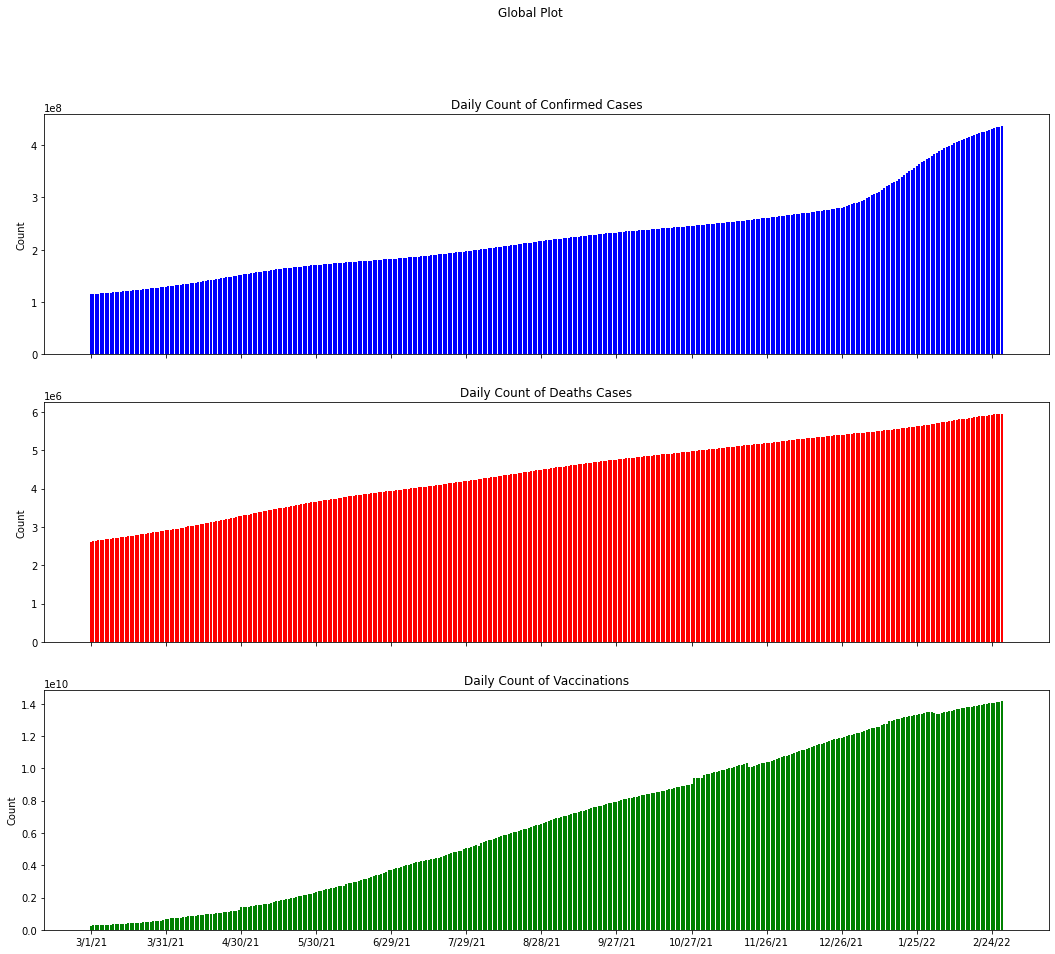

In [64]:
fig_1, axs_1 = plt.subplots(3, figsize=(18,15), sharex=True)
fig_1.suptitle('Global Plot')

plt.xticks(ticks=range(0, len(dates_format_1), 30), labels=dates_format_1[::30])

axs_1[0].bar(dates_format_1, aligned_oneyear_global_confirmed_df['Daily_Global_Confirmed'], color='blue')
axs_1[0].set_title('Daily Count of Confirmed Cases')
axs_1[0].set_ylabel('Count')

axs_1[1].bar(dates_format_1, aligned_oneyear_global_deaths_df['Daily_Global_Deaths'], color='red')
axs_1[1].set_title('Daily Count of Deaths Cases')
axs_1[1].set_ylabel('Count')

axs_1[2].bar(dates_format_1, aligned_oneyear_global_vaccines_df['Daily_Global_Vaccinations'], color='green')
axs_1[2].set_title('Daily Count of Vaccinations')
axs_1[2].set_ylabel('Count')

plt.show()

- Regional series:

In [57]:
import ipywidgets as widgets
from ipywidgets import interact

%matplotlib widget

country_list = aligned_aggregated_confirmed_df['Country/Region'].tolist()
country_dict = {n: i for i, n in list(enumerate(country_list))}

@interact(Country_Name=country_list)
def plot_by_region(Country_Name):

    fig_2, axs_2 = plt.subplots(1, 3, figsize=(12, 4))
    fig_2.suptitle(f'Regional Count: {Country_Name}')

    axs_2[0].plot(aligned_aggregated_confirmed_df.iloc[country_dict[Country_Name]][1:], color='blue')
    axs_2[0].set_title('Confirmed')
    axs_2[0].set_ylabel('Count')
    axs_2[0].set_xticks(ticks=range(0, len(dates_format_1), 90), labels=dates_format_1[::90])

    axs_2[1].plot(aligned_aggregated_deaths_df.iloc[country_dict[Country_Name]][1:], color='red')
    axs_2[1].set_title('Deaths')
    axs_2[1].set_xticks(ticks=range(0, len(dates_format_1), 90), labels=dates_format_1[::90])

    axs_2[2].plot(aligned_aggregated_vaccines_df.iloc[country_dict[Country_Name]][1:], color='green')
    axs_2[2].set_title('Vaccinations')
    axs_2[2].set_xticks(ticks=range(0, len(dates_format_1), 90), labels=dates_format_1[::90])

    plt.show()


interactive(children=(Dropdown(description='Country_Name', options=('Afghanistan', 'Albania', 'Algeria', 'Ando…

In [65]:
%matplotlib inline